In [1]:
#importing the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
data_dir = "D:/usersss/animal-dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [3]:
labels = ['goat', 'sheep']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data('D:/usersss/animal-dataset/train')
test = get_data('D:/usersss/animal-dataset/test')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


<ipython-input-3-31005d636317>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


C:\Users\pierre\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

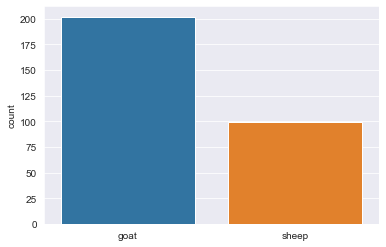

In [5]:
#visualizing the data
l = []
for i in train:
    if(i[1] == 0):
        l.append("goat")
    else:
        l.append("sheep")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'goat')

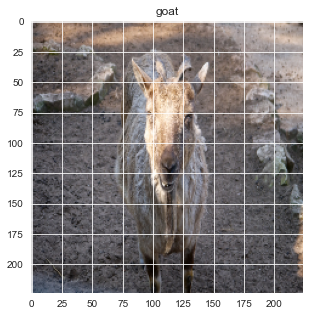

In [6]:
#visualizing a random goat image from the dataset
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'sheep')

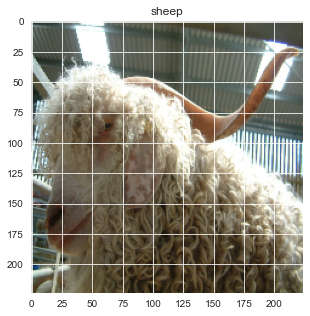

In [7]:
#visualizing a random sheep image from the dataset
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [8]:
#data preprocessing and augmentation
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

#Data augmentation on the train data:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [9]:
#defining the CNN Model:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [10]:
#compiling the model using Adam as the optimizer and SparseCategoricalCrossentropy as the loss function. Using a lower learning rate of 0.000001 for a smoother curve
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [12]:
#train model for 10 epochs.

history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_test, y_test))

Epoch 1/10
10/10 [==============================] - 16s 2s/step - loss: 0.6288 - accuracy: 0.6711 - val_loss: 0.7148 - val_accuracy: 0.5595
Epoch 2/10
10/10 [==============================] - 19s 2s/step - loss: 0.6307 - accuracy: 0.6711 - val_loss: 0.7126 - val_accuracy: 0.5595
Epoch 3/10
10/10 [==============================] - 22s 2s/step - loss: 0.6278 - accuracy: 0.6711 - val_loss: 0.7114 - val_accuracy: 0.5595
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.6265 - accuracy: 0.6711 - val_loss: 0.7110 - val_accuracy: 0.5595
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.6276 - accuracy: 0.6711 - val_loss: 0.7124 - val_accuracy: 0.5595
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 0.6345 - accuracy: 0.6711 - val_loss: 0.7109 - val_accuracy: 0.5595
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.6298 - accuracy: 0.6711 - val_loss: 0.7126 - val_accuracy: 0.5595
Epoch 8/10
10/10 [==

In [13]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (301, 224, 224, 3)
y_train shape: (301,)
x_test shape: (168, 224, 224, 3)
y_test shape: (168,)


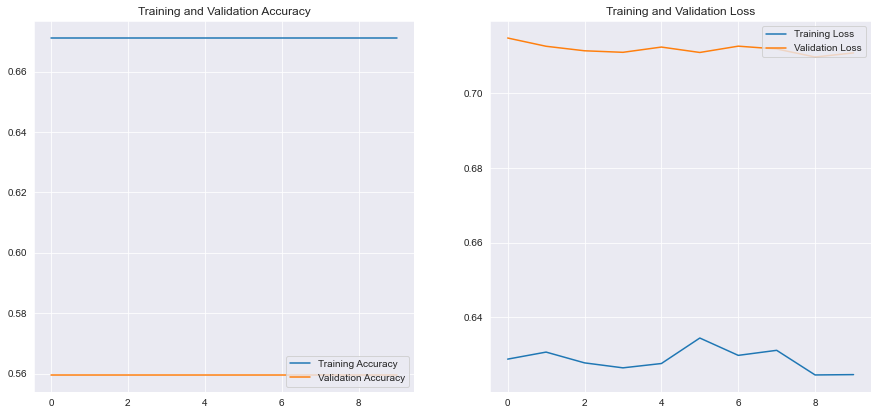

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes, target_names=['goat (Class 0)', 'sheep (Class 1)']))


6/6 [==============================] - 3s 486ms/step
                 precision    recall  f1-score   support

 goat (Class 0)       0.56      1.00      0.72        94
sheep (Class 1)       0.00      0.00      0.00        74

       accuracy                           0.56       168
      macro avg       0.28      0.50      0.36       168
   weighted avg       0.31      0.56      0.40       168



C:\Users\pierre\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pierre\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pierre\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

9406464/9406464 [==============================] - 11s 1us/step


In [23]:
#freeze base before compiling and training the model. Freezing will prevent the weights in base model from being updated during training
base_model.trainable = False

In [24]:
#define our model using our base_model followed by a GlobalAveragePooling function to convert the features into a single vector per image. We add a dropout of 0.2 and the final dense layer with 2 neurons and softmax activation.
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(2, activation="softmax")])

In [47]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\pierre\anaconda\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pierre\anaconda\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pierre\anaconda\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pierre\anaconda\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\pierre\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pierre\anaconda\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 244, 244, 3), found shape=(None, 224, 224, 3)


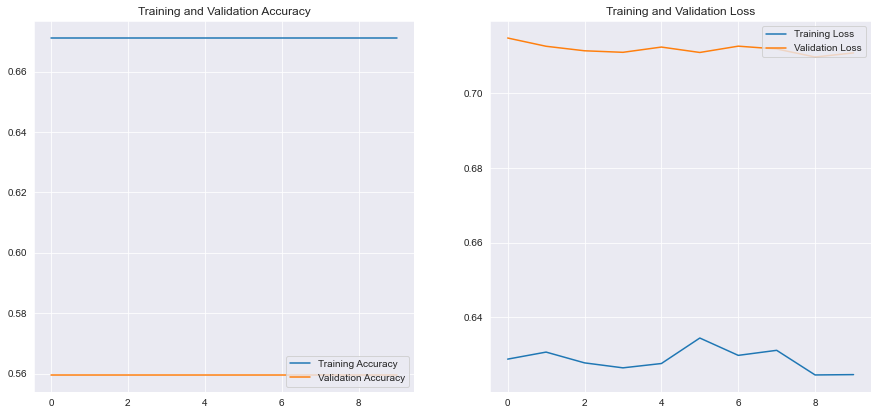

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
# Saving the model 
model.save('sheep_goat_classifier.h5')

In [53]:
from keras.models import load_model

# Load the saved model
model = load_model('sheep_goat_classifier.h5')